In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Makes graphs are embedded in Jupyter notebook instead of displaying as pop-ups
%matplotlib inline

In [ ]:
superstore_df = pd.read_excel("./GlobalSuperstore.xls")

superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2019-11-09,2019-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2019-11-09,2019-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2019-06-13,2019-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


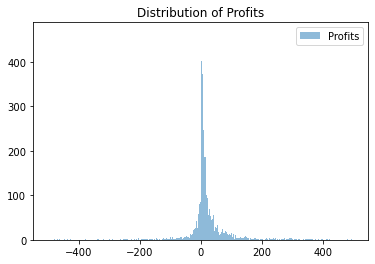

In [3]:
plt.figure();
plt.hist(superstore_df["Profit"][(superstore_df["Profit"] > -500) & (superstore_df["Profit"] < 500)], bins=np.arange(-500, 500, 1), alpha=0.5);

# Modify parameters
plt.title("Distribution of Profits")
plt.legend(["Profits"]);

,Sales,Quantity,Profit,Customer ID,Sales per Customer,Profit Ratio,Unique Names
Region,,,,,,,
Central,501239.8908,8780,39706.3625,629,797.0,7.9,629
East,678781.2400,10618,91522.7800,674,1007.0,13.5,674
South,391721.9050,6209,46749.4303,512,765.0,11.9,512
West,725457.8245,12266,108418.4489,686,1058.0,14.9,686


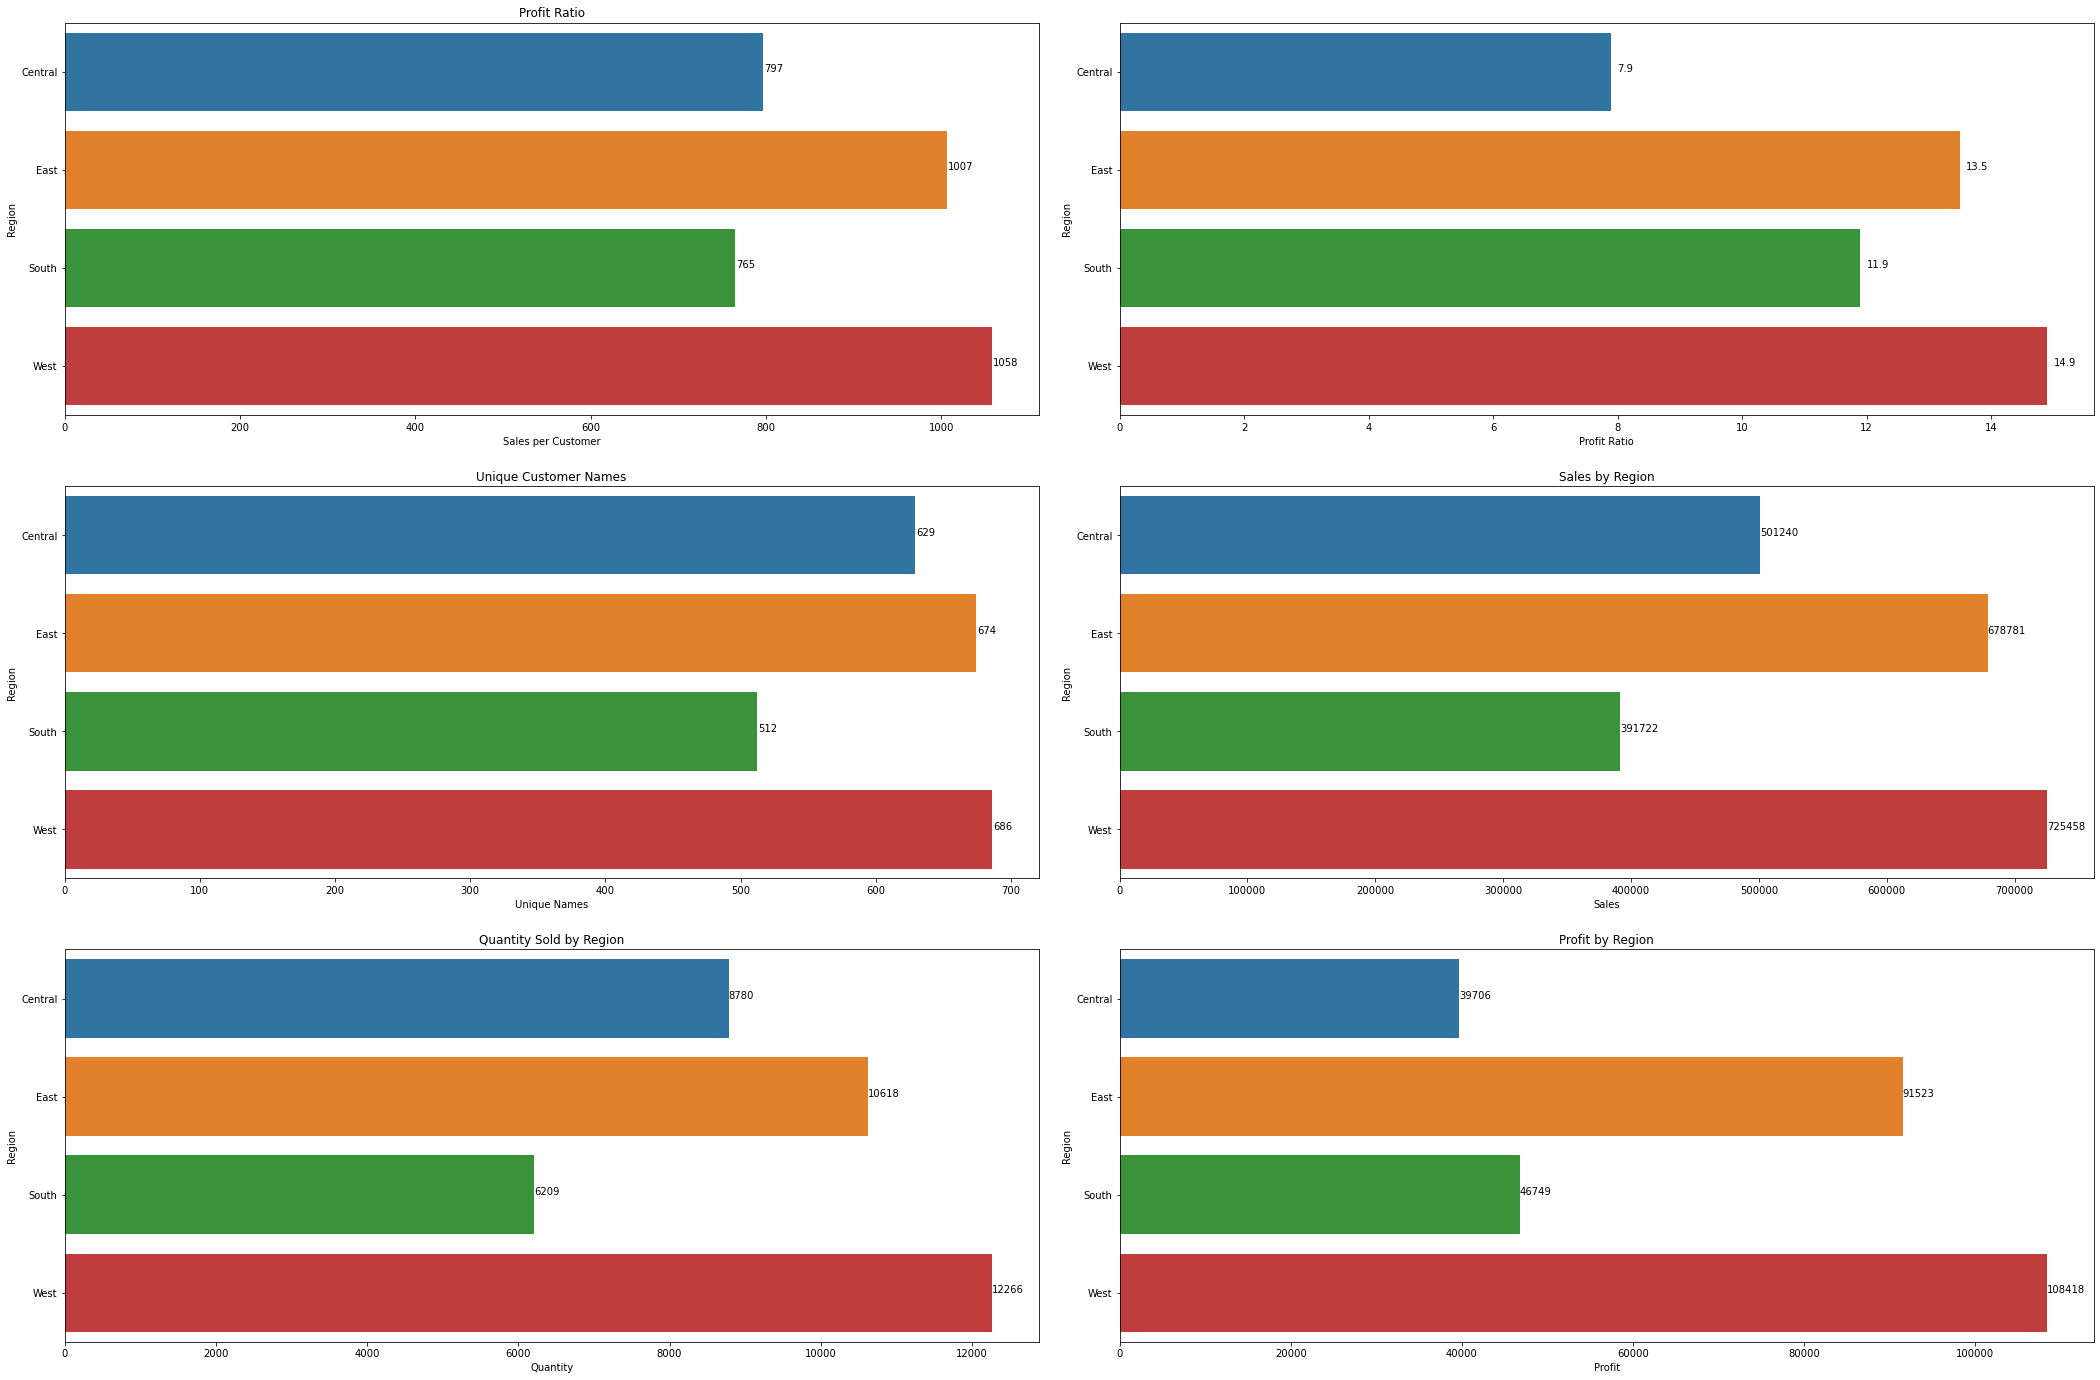

In [4]:
# Show labels on barplots
def show_values(axs, orient="v", space=.01, round=0):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = ("{:."+str(round)+"f}").format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = ("{:."+str(round)+"f}").format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# Data processing
region_sales_df = superstore_df[["Region", "Sales", "Quantity", "Profit"]].groupby("Region").sum()
region_customer_df = superstore_df[["Region", "Customer ID"]].groupby("Region").nunique()
sales_customer_df = region_sales_df.merge(region_customer_df, on="Region")
sales_customer_df["Sales per Customer"] = round(sales_customer_df["Sales"] / sales_customer_df["Customer ID"])
sales_customer_df["Profit Ratio"] = round(sales_customer_df["Profit"] / sales_customer_df["Sales"] * 100, 1)
sales_customer_df["Unique Names"] = superstore_df[["Region", "Customer Name"]].groupby("Region").nunique()

# Create subplots (row, column)
fig, axes = plt.subplots(3, 2, figsize=(30,20))
plt.tight_layout(pad=5)

ax_00 = sns.barplot(ax=axes[0,0], data=sales_customer_df, x="Sales per Customer", y=sales_customer_df.index)
show_values(ax_00, "h", 1)
axes[0,0].set_title("Sales per Customer")

ax_01 = sns.barplot(ax=axes[0,1], data=sales_customer_df, x="Profit Ratio", y=sales_customer_df.index)
show_values(ax_01, "h", space=.1, round=1)
axes[0,0].set_title("Profit Ratio")

ax_10 = sns.barplot(ax=axes[1,0], data=sales_customer_df, x="Unique Names", y=sales_customer_df.index)
show_values(ax_10, "h", 1)
axes[1,0].set_title("Unique Customer Names")

ax_11 = sns.barplot(ax=axes[1,1], data=sales_customer_df, x="Sales", y=sales_customer_df.index)
show_values(ax_11, "h", 1)
axes[1,1].set_title("Sales by Region")

ax_20 = sns.barplot(ax=axes[2,0], data=sales_customer_df, x="Quantity", y=sales_customer_df.index)
show_values(ax_20, "h", 1)
axes[2,0].set_title("Quantity Sold by Region")

ax_21 = sns.barplot(ax=axes[2,1], data=sales_customer_df, x="Profit", y=sales_customer_df.index)
show_values(ax_21, "h", 1)
axes[2,1].set_title("Profit by Region")

display(sales_customer_df)

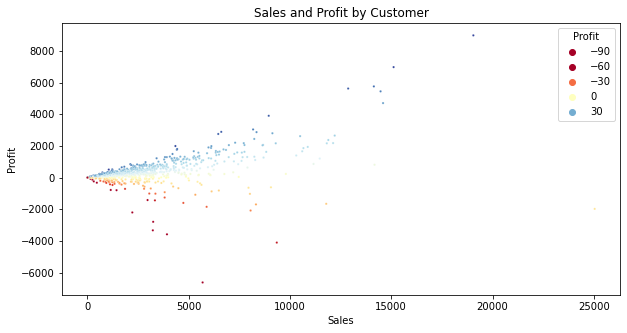

In [108]:
customer_profit_df = superstore_df[["Customer ID", "Sales", "Profit"]].groupby("Customer ID").sum()
# customer_profit_df["Net Profit"] = customer_profit_df["Profit"].apply(lambda x: "Gain" if x>=0 else "Loss")
customer_profit_df["Profit Ratio"] = customer_profit_df["Profit"] / customer_profit_df["Sales"] * 100

plt.figure(figsize=(10, 5));

# Plotting using Pandas dataframe
sns.scatterplot(x="Sales",
                y="Profit",
                data=customer_profit_df,
                hue="Profit Ratio",
                s=5,
                palette="RdYlBu",
                hue_norm=(-50,50))
plt.legend(title='Profit', loc='upper right')
plt.title("Sales and Profit by Customer")
plt.draw()

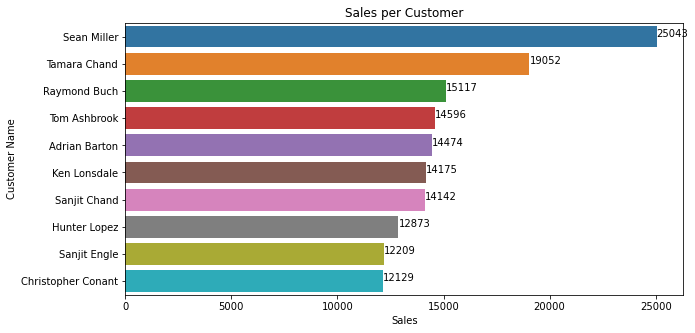

In [109]:
customer_ranking_df = customer_profit_df.merge(superstore_df[["Customer ID", "Customer Name"]], on="Customer ID", how="left").drop_duplicates().sort_values(by="Sales", ascending=False).reset_index(drop=True).iloc[:10]

plt.figure(figsize=(10, 5))

ax = sns.barplot(data=customer_ranking_df, x="Sales", y="Customer Name")
show_values(ax, "h", 1)
ax.set_title("Sales per Customer")
plt.draw()

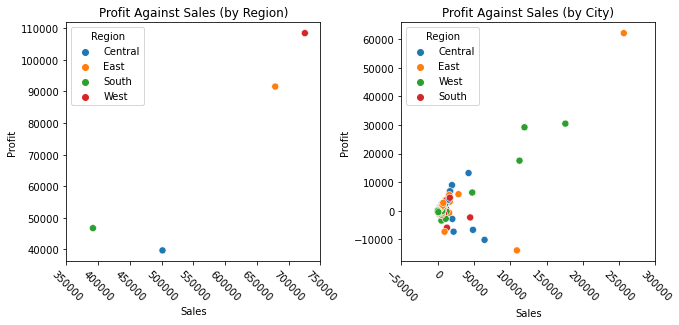

In [5]:
# Create subplots (row, column)
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plt.tight_layout(pad=5)

region_df = superstore_df.groupby(["Region"]).sum()
city_df = superstore_df.groupby(["City", "Region"]).sum()

# Plotting using Pandas dataframe
sns.scatterplot(ax=axes[0],
                x="Sales",
                y="Profit",
                data=region_df,
                hue="Region",
                s=50);
plt.draw()
axes[0].set_title("Profit Against Sales (by Region)")
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45);

# Plotting using Pandas dataframe
sns.scatterplot(ax=axes[1],
                x="Sales",
                y="Profit",
                data=city_df,
                hue="Region",
                s=50);
plt.draw()
axes[1].set_title("Profit Against Sales (by City)")
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45);

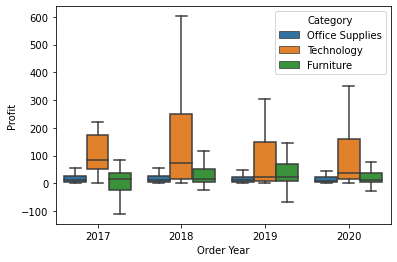

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

ny_df = superstore_df[superstore_df["City"]=="New York City"]
ny_df["Order Datetime"] = pd.to_datetime(ny_df["Order Date"])
ny_df["Order Year"] = pd.DatetimeIndex(ny_df["Order Datetime"]).year

sns.boxplot(data=ny_df, x="Order Year", y="Profit", hue="Category", showfliers=False);